In [1]:
# Import all required libraries

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

In [2]:
#import titanic data files

df_train=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Doctor_fee_consultation/Final_Train.xlsx")

df_test=pd.read_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Doctor_fee_consultation/Final_Test.xlsx")

In [3]:
# Checking column data for analysis
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,Not Given,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
# Checking null values & data type of all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   int64  
 2   Rating              2659 non-null   float64
 3   Place               5961 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  5961 non-null   object 
 6   Fees                5961 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 326.1+ KB


In [5]:
import numpy as np
df_train['Rating'].replace(np.NaN,df_train['Rating'].mean,inplace=True)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 326.1+ KB


In [7]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Qualification','Experience','Place','Profile','Miscellaneous_Info','Fees']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df_train[column] = label_encoders[column].fit_transform(df_train[column])  # if numpy instead of pandas use X[:, column] instead

In [8]:
# Checking for skewness for each of the column
df_train.skew()

Qualification         0.239720
Experience            0.998674
Place                 0.113172
Profile               0.108803
Miscellaneous_Info   -1.043598
Fees                  0.185038
dtype: float64

In [9]:
# Checking summery statistics for all numeric coluns of train dataset
df_train.describe()

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,16.317564,416.037410,2.441872,1972.966952,18.930381
std,413.842446,11.116526,258.795646,1.658014,794.441630,8.185456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,8.000000,197.000000,1.000000,1477.000000,12.000000
50%,596.000000,13.000000,412.000000,2.000000,2504.000000,21.000000
75%,943.000000,22.000000,629.000000,4.000000,2504.000000,28.000000
max,1419.000000,63.000000,877.000000,5.000000,2998.000000,39.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   int32 
 1   Experience          5961 non-null   int64 
 2   Rating              5961 non-null   object
 3   Place               5961 non-null   int32 
 4   Profile             5961 non-null   int32 
 5   Miscellaneous_Info  5961 non-null   int32 
 6   Fees                5961 non-null   int64 
dtypes: int32(4), int64(2), object(1)
memory usage: 233.0+ KB


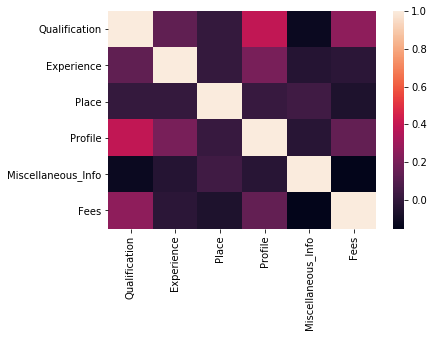

In [10]:
# checking correlation using heatmap
dfcor=df_train.corr()
sns.heatmap(dfcor)

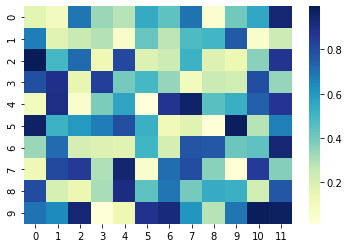

In [11]:
# Data Visualization - Multivariate Plots

import numpy as np
import seaborn as sns
data = np.random.rand(10, 12)
ax = sns.heatmap(data, cmap="YlGnBu")

In [12]:
# Checking column data for analysis
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [14]:
import numpy as np
df_test['Rating'].replace(np.NaN,df_test['Rating'].mean,inplace=True)

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   int32 
 1   Experience          1987 non-null   int32 
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: int32(2), object(4)
memory usage: 77.7+ KB


# As df_test dataset don't have "Fees" column hence adding it & predicting the accuracy score with this model

In [18]:
df_test.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,241,28,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,0
1,340,24,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,0


In [19]:
df_test['Fees'] = 0
df_test[['Qualification', 'Fees']].to_excel("F:/Pranjali/Data Science/Eval Project/Data Files/Doctor_fee_consultation/Final_Test.xlsx", index=False)

In [33]:
# Fees column 
df_test['Fees'] = df_test.Qualification == '629'
df_test['Fees'] = df_test.Fees.apply(lambda x: int(x))
df_test.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,241,28,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,0
1,340,24,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,0


In [36]:
import pandas as pd
X = df_test[['Qualification','Fees']]
y = df_test.Fees        # y is a vector, hence we use dot to access 'label'

In [52]:
import numpy as np
df_test['Qualification'].replace(np.NaN,df_test['Qualification'].mean,inplace=True)
df_test['Fees'].replace(np.NaN,df_test['Fees'].mean,inplace=True)


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   int32 
 1   Experience          1987 non-null   int32 
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
 6   Fees                1987 non-null   int64 
dtypes: int32(2), int64(1), object(4)
memory usage: 93.3+ KB


In [39]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1987, 2)


In [40]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1987,)


In [43]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [44]:
# Linear regression in scikit-learn
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Interpreting model coefficients
# print the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

0.0
[0. 0.]


In [46]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [47]:
# calculate MAE using scikit-learn
from sklearn import metrics

# Computing the MAE
print("Mean Accuracy Error: ",metrics.mean_absolute_error(y_test, y_pred))

# Computing the MSE
print("Mean Sqr Error:   ",metrics.mean_squared_error(y_test, y_pred))

# Computing the RMSE
print("Root mean sqr error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Accuracy Error:  0.0
Mean Sqr Error:    0.0
Root mean sqr error:  0.0


In [48]:
# Use for loop to iterate rstate to get the r2score.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

# Split data using train_test_split method
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,test_size=0.001)

max_rscore=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size=0.001)
    regrn = linear_model.LinearRegression()
    regrn.fit(X_train,y_train)
    y_pred = regrn.predict(X_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_rscore:
        max_rscore=r2_scr
        final_r_state=r_state
print("max r2 score corresponds to",final_r_state," is ",max_rscore)

max r2 score corresponds to 42  is  1.0


In [49]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(X_train,y_train)
    print(sv.score(X_train,y_train))

1.0
1.0
1.0


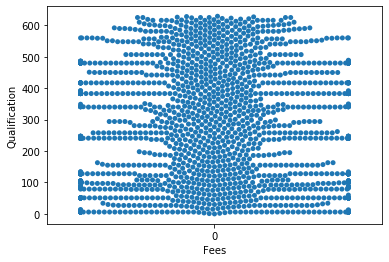

In [50]:
sns.swarmplot(x='Fees', y='Qualification', data=df_test);

In [51]:
from sklearn.externals import joblib

joblib_file = "joblib_regrn.pkl"             # Save to file in the current working directory
joblib.dump(regrn, joblib_file)
joblib_regrn = joblib.load(joblib_file)      # Load from file
score = joblib_regrn.score(X_test, y_test)   # Calculate the accuracy and predictions
print("Test score for Linear Regression Model: {0:.2f} %".format(100 * score))

Test score for Linear Regression Model: 100.00 %


Conclusion - Test score & Test accuracy for Doctor's Consultation fees is 100% . 